Ex 3 \
Covariance and Correlation Measure Analysis

In [1]:
%pip install seaborn numpy pandas matplotlib kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing Required Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load Dataset


In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_name = "data.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "shriyashjagtap/indian-personal-finance-and-spending-habits",
    file_name,
)

df.head()

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\admin\AppData\Local\Temp\ipykernel_1920\690296717.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  str    
 4   City_Tier                        20000 non-null  str    
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities                    

Preprocessing


In [5]:
df.isnull().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
num_df = df.select_dtypes(include=["int64","float64"])
num_df.head()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [8]:
selected_features = [
    'Rent',
    'Income',
    'Entertainment',
    'Utilities',
    'Healthcare',
    'Education',
    'Desired_Savings'
]

num_df = num_df[selected_features]
num_df.head()

,Rent,Income,Entertainment,Utilities,Healthcare,Education,Desired_Savings
0,13391.174891,44637.249636,1536.184255,2911.792231,1546.914539,0.000000,6200.537192
1,5371.719318,26858.596592,1050.241738,1626.143346,1137.351325,1551.723167,1923.176434
2,7555.140763,50367.605084,1723.306926,3368.457108,2178.515847,3160.026299,7050.360422
3,15218.340037,101455.600247,2858.194240,6128.550387,4571.118217,0.000000,16694.965136
4,4975.056710,24875.283548,660.186852,1092.689024,1169.095816,1445.215694,1874.099434


In [9]:
#Derived Attribute

num_df["Expenses"] = num_df["Entertainment"] + num_df["Utilities"] + num_df["Education"] + num_df['Rent']
num_df.head()

,Rent,Income,Entertainment,Utilities,Healthcare,Education,Desired_Savings,Expenses
0,13391.174891,44637.249636,1536.184255,2911.792231,1546.914539,0.000000,6200.537192,17839.151377
1,5371.719318,26858.596592,1050.241738,1626.143346,1137.351325,1551.723167,1923.176434,9599.827569
2,7555.140763,50367.605084,1723.306926,3368.457108,2178.515847,3160.026299,7050.360422,15806.931095
3,15218.340037,101455.600247,2858.194240,6128.550387,4571.118217,0.000000,16694.965136,24205.084664
4,4975.056710,24875.283548,660.186852,1092.689024,1169.095816,1445.215694,1874.099434,8173.148279


Covariance Matrix

In [10]:
cov_matrix = num_df.cov()
cov_matrix

,Rent,Income,Entertainment,Utilities,Healthcare,Education,Desired_Savings,Expenses
Rent,8.564074e+07,3.478521e+08,1.220338e+07,2.114157e+07,1.387426e+07,2.166294e+07,6.143357e+07,1.406486e+08
Income,3.478521e+08,1.601163e+09,5.622162e+07,9.736331e+07,6.377148e+07,9.851130e+07,2.922796e+08,5.999483e+08
Entertainment,1.220338e+07,5.622162e+07,2.217178e+06,3.413223e+06,2.240851e+06,3.467572e+06,1.021867e+07,2.130135e+07
Utilities,2.114157e+07,9.736331e+07,3.413223e+06,6.365438e+06,3.880121e+06,5.970368e+06,1.766342e+07,3.689060e+07
Healthcare,1.387426e+07,6.377148e+07,2.240851e+06,3.880121e+06,2.650915e+06,3.903681e+06,1.161161e+07,2.389891e+07
Education,2.166294e+07,9.851130e+07,3.467572e+06,5.970368e+06,3.903681e+06,9.600319e+06,1.761751e+07,4.070120e+07
Desired_Savings,6.143357e+07,2.922796e+08,1.021867e+07,1.766342e+07,1.161161e+07,1.761751e+07,5.980653e+07,1.069332e+08
Expenses,1.406486e+08,5.999483e+08,2.130135e+07,3.689060e+07,2.389891e+07,4.070120e+07,1.069332e+08,2.395418e+08


In [11]:
def define_covariance(cov):
    if(cov > 0):
        print("Positive Covariance")
    elif(cov < 0):
        print("Negative Covariance")
    else:
        print("Zero Covariance")
    

In [12]:
inc_sav_cov = cov_matrix.loc["Income","Desired_Savings"]
print(inc_sav_cov)
define_covariance(inc_sav_cov)

292279634.4278605
Positive Covariance


In [13]:
inc_exp_cov = cov_matrix.loc["Income","Expenses"]
print(inc_exp_cov)
define_covariance(inc_exp_cov)


599948283.3775856
Positive Covariance


Correlation

In [14]:
corr_matrix = num_df.corr()
corr_matrix.head()

,Rent,Income,Entertainment,Utilities,Healthcare,Education,Desired_Savings,Expenses
Rent,1.000000,0.939370,0.885604,0.905489,0.920814,0.755500,0.858403,0.981985
Income,0.939370,1.000000,0.943594,0.964414,0.978838,0.794558,0.944510,0.968736
Entertainment,0.885604,0.943594,1.000000,0.908553,0.924304,0.751592,0.887401,0.924307
Utilities,0.905489,0.964414,0.908553,1.000000,0.944568,0.763738,0.905287,0.944737
Healthcare,0.920814,0.978838,0.924304,0.944568,1.000000,0.773809,0.922190,0.948396


In [15]:
def define_correlation(corr):
    if(corr > 0):
        print("Positive Correlation")
    elif(corr < 0):
        print("Negative Correlation")
    else:
        print("Zero Correlation") 

In [16]:
inc_sav_corr = corr_matrix.loc["Income","Desired_Savings"]
print(inc_sav_corr)
define_correlation(inc_sav_corr)

0.9445096894156292
Positive Correlation


In [17]:
#Strongly Correlated features
strong_corr = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]
strong_corr


,Rent,Income,Entertainment,Utilities,Healthcare,Education,Desired_Savings,Expenses
Rent,1.000000,0.939370,0.885604,0.905489,0.920814,0.755500,0.858403,0.981985
Income,0.939370,1.000000,0.943594,0.964414,0.978838,0.794558,0.944510,0.968736
Entertainment,0.885604,0.943594,1.000000,0.908553,0.924304,0.751592,0.887401,0.924307
Utilities,0.905489,0.964414,0.908553,1.000000,0.944568,0.763738,0.905287,0.944737
Healthcare,0.920814,0.978838,0.924304,0.944568,1.000000,0.773809,0.922190,0.948396
Education,0.755500,0.794558,0.751592,0.763738,0.773809,1.000000,0.735237,0.848738
Desired_Savings,0.858403,0.944510,0.887401,0.905287,0.922190,0.735237,1.000000,0.893403
Expenses,0.981985,0.968736,0.924307,0.944737,0.948396,0.848738,0.893403,1.000000


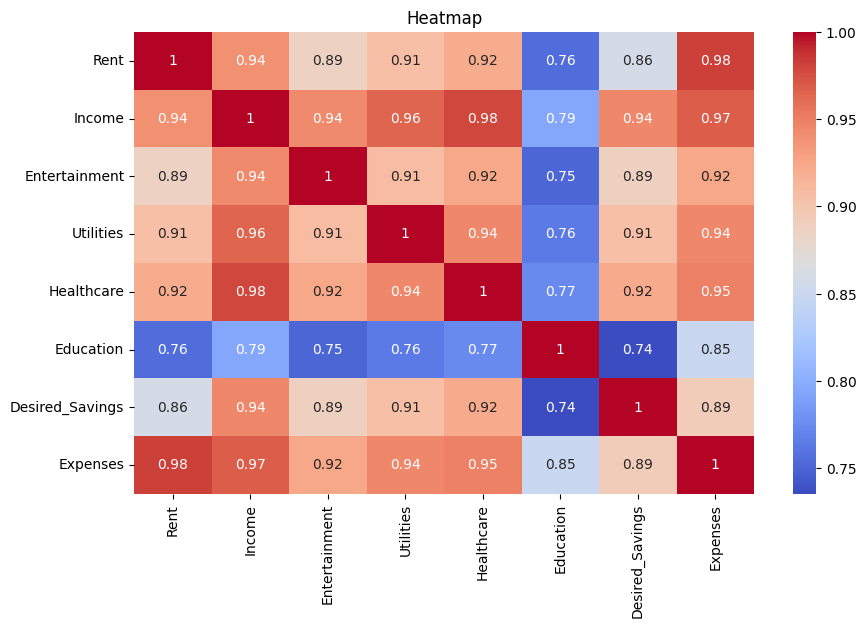

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Heatmap")
plt.show()

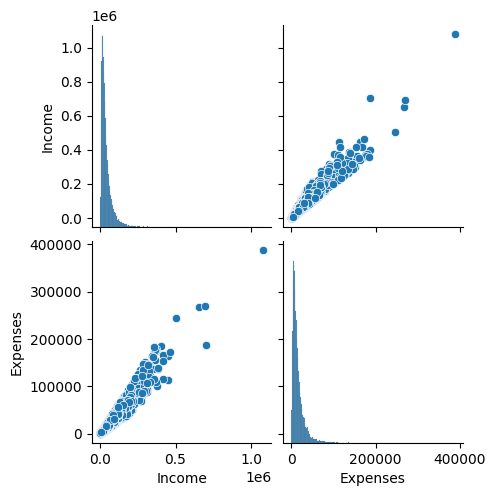

In [19]:
sns.pairplot(num_df[['Income', 'Expenses']])
plt.show()
